In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import datagen as dg
import ml_perceptron as mlp

## Classification of linearly non-separable data

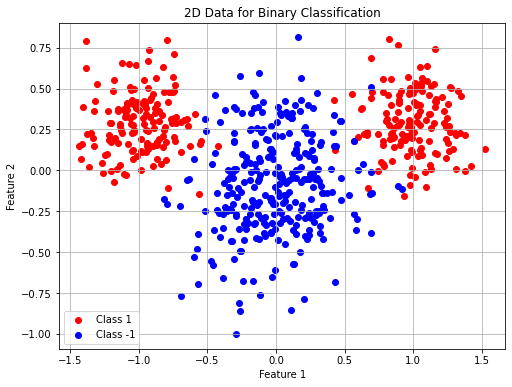

(300, 2)

In [2]:
classA, classB = dg.generate_data(ndata=300)
dg.visualize_data(classA, classB)
classA.shape

In [3]:
# shuffle the samples
data, label = dg.shuffle_data(classA, classB)
data.shape

(600, 2)

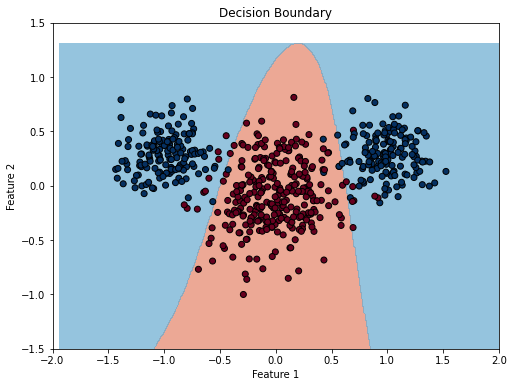

In [4]:
input_dim = 2
hidden_dim = 10
output_dim = 1

perceptron = mlp.MultiLayersPerceptron(input_dim, hidden_dim, output_dim, task=mlp.TASK1)
perceptron.train(data, label, epochs=200, lr = 0.01, batch_size=50)

## The encoder problem

In [6]:
patterns = np.eye(8) * 2 - 1
targets = patterns

print("Patterns:\n", patterns)
print("Targets:\n", targets)

Patterns:
 [[ 1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]]
Targets:
 [[ 1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]]


In [7]:
input_dim = 8
hidden_dim = 3
output_dim = 8

perceptron = mlp.MultiLayersPerceptron(input_dim, hidden_dim, output_dim, task=mlp.TASK2)
perceptron.autoencode(patterns, epochs=100, lr = 0.001)

ValueError: operands could not be broadcast together with shapes (3,) (8,) (3,) 